# Exercise 1 - Toffoli gate

## Historical background

Forty years ago, a ragtag group of 50 thinkers arranged themselves for a photo on the lawn of MIT’s Endicott House. Few at the Physics of Computation Conference, jointly organized by MIT and IBM, thought they were making history in 1981. It was arguably the birthplace of physics of computing, and especially the now-burgeoning field of quantum computing, as a serious subject worthy of a textbook or university course.

It was at this conference where Feynman uttered his now-famous quote: “Nature isn’t classical, dammit, and if you want to make a simulation of nature, you’d better make it quantum mechanical, and by golly it’s a wonderful problem, because it doesn’t look so easy.”[1] Earlier this month, we celebrated the 40th anniversary of this important conference. You can read more [here](https://youtu.be/GR6ANm6Z0yk).

![](resources/conference-photo.jpeg)

One of the theme discussed in the conference was reversible computing, which Tommaso Toffoli and Edward Fredkin in MIT have been thinking about in the past few years prior.[2-3] Toffoli came up with a reversible version of AND/NAND gate (which are now called Toffoli gate, or controlled-controlled-NOT gate). Because NAND gate is universal in classical computing, Toffoli gate is a universal reversible logic gate. Quantum computing is a special form of reversible computing; any reversible gate can be implemented on a quantum computer, and hence the Toffoli gate is also a quantum logic gate. However, Toffoli gate alone is not a universal gate for quantum computing. 

In this exercise, we will explore the Toffoli gate and universal gate sets for quantum computers.

### References
1. Feynman, Richard P. "Simulating physics with computers." Int. J. Theor. Phys 21.6/7 (1982).
1. Toffoli, Tommaso. "Reversible computing." International colloquium on automata, languages, and programming. Springer, Berlin, Heidelberg, 1980.
1. Fredkin, Edward, and Tommaso Toffoli. "Conservative logic." International Journal of theoretical physics 21.3 (1982): 219-253.

## Classical logic gates

In classical computation one often used model is Boolean logic or classical logical gates. Such gates represent Boolean functions, functions with only binary (0,1) input and output. One interesting aspect of Boolean logic is, that all possible binary functions can be formed by only using a combination of only a small number of different logic gates. Such sets are called functionally complete sets. One famous such set is AND and NOT. These two gates are enough to express all possible functions. The same is true for OR and NOT. There exists smaller sets, such as the NAND and NOR which alone are universal, nevertheless the functions AND, NOT and OR are often seen as the basic blocks of classical computation.

<div class="alert alert-block alert-success">

**Goal**

Construct a Toffoli gate using the basis gate set (CX, RZ, SX and X gates) of IBM Quantum systems.

</div>

<div class="alert alert-block alert-danger">
    
This exercise aims to teach you the basic concepts of quantum gates and how to construct quantum circuits
1. visually using the Circuit Composer widget
1. programmatically using Qiskit. 

If you are already familiar with quantum gates and Qiskit. You can jump directly to <a href=#problem>the problem</a>.
</div>

In [1]:
# Getting rid of unnecessary warnings
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Useful to have pi
import math
pi=math.pi

## What are quantum circuits?

Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Quantum gates often represent rotations on the Bloch sphere. Let's take a look at some of the popular quantum gates.

### X gate 

The X-gate is represented by the Pauli-X matrix: 

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

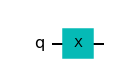

In [10]:
x_gate=QuantumCircuit(1) # Create a quantum circuit with 1 qubit
x_gate.x(0)
x_gate.draw(output='mpl')

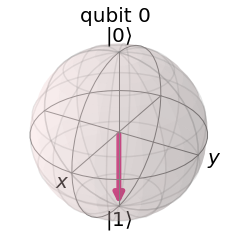

In [11]:
backend = Aer.get_backend('statevector_simulator')
result = execute(x_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### SX gate

The SX gate equates to a rotation around the X-axis of the Bloch sphere by $\pi/2$. It is called SX gate to indicate that it is the square-root of the X gate. Applying this gate twice produces the standard Pauli-X gate. The opposite of the SX is the SX dagger, which is a rotation by $\pi/2$ in the opposite direction.

$SX = \frac{1}{2}\begin{pmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{pmatrix}$

In [ ]:
sx_gate = QuantumCircuit(1)
sx_gate.sx(0)  
sx_gate.draw(output='mpl')

In [ ]:
backend = Aer.get_backend('statevector_simulator')
result = execute(sx_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### RZ gate

The Rz gate performs a rotation of $\phi$ around the Z-axis direction (Where $\phi$ is a real number). It has the matrix below:

$RZ = \begin{pmatrix}
1 & 0 \\
0 & e ^{i \phi } \\
\end{pmatrix}$

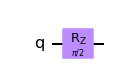

In [12]:
rz_gate = QuantumCircuit(1)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

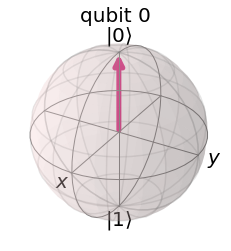

In [13]:
backend = Aer.get_backend('statevector_simulator')
result = execute(rz_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

Since the rotation is around the Z-axis one would not see a difference when we apply it to the default state $|0\rangle$, so we use the state which was generated by applying the SX gate instead and apply the RZ to it.

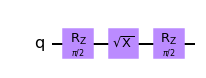

In [14]:
rz_gate.sx(0)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

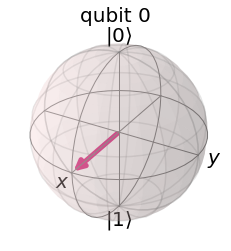

In [15]:
backend = Aer.get_backend('statevector_simulator')
result = execute(rz_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### Hadamard gate
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the X-axis and Z-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$. What the Hadamard does is to transform between the $|0\rangle$ $|1\rangle$ and the $|+\rangle$ $|-\rangle$ base. 

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

In [ ]:
# Let's do an H-gate on a |0> qubit
h_gate = QuantumCircuit(1)
h_gate.h(0)
h_gate.draw(output='mpl')

In [ ]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(h_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### CX gate (CNOT gate)

The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. 

Note: Qiskit numbers the bits in a string from right to left.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

In [ ]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

### CCX gate (Toffoli gate)

The CCX gate (controlled controlled X Gate) is also called a Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. 

Note: Qiskit numbers the bits in a string from right to left.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

In [ ]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

## Create logical gates with the help of quantum gates

### NOT gate

The NOT gate flips the value of a bit and, as was mentioned before, an X gate can be considered a NOT gate. The truth table for a NOT gate looks like this:

| Input | Output |
| --- | --- | 
| 1 | 0 |
| 0 | 1 |

In [ ]:
not_gate=QuantumCircuit(1,1) # Create a quantum circuit with 1 qubit and 1 classical bit
not_gate.x(0)
not_gate.measure(0,0)
not_gate.draw(output='mpl')

### AND gate

The output of an AND is true if and only if both inputs are true. The truth table for an AND Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

With a Toffoli gate, we can get the result of an AND gate by interpreting the two control bits as the input bits and the target bit as the output bit.

In [ ]:
and_gate=QuantumCircuit(3,1) # Create a quantum circuit with 3 qubits and 1 classical bit
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw(output='mpl')

### OR gate

An OR gate returns true if at least one of the input gates is true.
The truth table for an OR Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

In [ ]:
or_gate=QuantumCircuit(3,1) # Create a quantum circuit with 3 qubits and 1 classical bit
or_gate.cx(1,2)
or_gate.cx(0,2)
or_gate.ccx(0,1,2)
or_gate.measure(2,0)
or_gate.draw(output='mpl')

## Using the Circuit Composer widget

You might be familiar with the IBM quantum circuit composer, where you can generate circuits while using a graphical interface. With the new circuit composer widget, the same functionality  can be used in a jupyter notebook. You can learn more about how to use the widget [here](https://quantum-computing.ibm.com/lab/docs/iql/composer-widget)

<div class="alert alert-block alert-success">

**Exercise 1a:** Build a NOR (a negated OR) gate using circuit composer
    
This exercise is intended to encourage you to play around a bit with the composer. It is not graded. You can skip ahead if you want. Executing the cell below will show you a composer, where you can add gates by dragging them onto the correct place.    
</div>

In [ ]:
from ibm_quantum_widgets import CircuitComposer
editor = CircuitComposer()
editor

### Use the Circuit Composer widget to work with an existing circuit

We can also use the circuit composer to open a previously created circuit. With the code below we will open the circuit created above, which represents the OR gate. You can use this to check if you constructed your OR correctly.

<div class="alert alert-block alert-success">

You can edit the opened circuit by drag and drop. Try to delete the measurement at the end.
    
</div>

In [ ]:
from ibm_quantum_widgets import CircuitComposer
editor2 = CircuitComposer(circuit=or_gate)
editor2

In the example below we store the last circuit from the composer in the variable qc2 and then apply an X to the output and measure again.

Use circuit from last editor and apply an X to the output and measure again.

In [ ]:
qc2 = editor2.circuit

qc2.x(2)
qc2.measure((2), (0))

qc2.draw(output='mpl')

We now have created a NOR the negation of an OR, it should be identical to the circuit you constructed yourself in the first exercise. 

## Composite quantum gates and their cost

A real quantum computer normally does not have physical implementations of all gates. Instead they use a small set of base gates, which form a universal gate set, this is, similar to the classical case, a set of instructions which can be used to implement all possible operations.

For this reason, quantum circuits must be transpiled into basis gates before execution. This is usually done automatically by Qiskit transpiler when a quantum circuit is sent to a IBM Quantum system. But for the learning purposes, you are expected to construct the circuit by hand using the basis gates. The basis gates for IBM Quantum system is typically CX, ID, RZ, SX and X gates. You can see [`ibmq_mumbai` system](https://quantum-computing.ibm.com/services?skip=0&systems=all&system=ibmq_mumbai) for an example.

Now let’s  take a look at the circuit below:

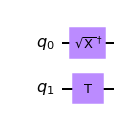

In [16]:
qc = QuantumCircuit(2)
qc.sxdg(0)
qc.t(1)
qc.draw(output='mpl')

Now lets show how a decomposition of the above circuit for a quantum computer, using only the base gates, could look.

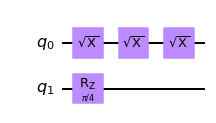

In [17]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.sx(0)
qc.sx(0)
qc.rz(pi/4,1)
qc.draw(output='mpl')

As you can see, we now use only the base gates, but for this reason more total gates are used. The more gates a circuit has, the more complex it is to run. So, when we want to calculate the cost of a circuit, we consider the number of gates used. However, not all gates are considered equal expensive, so when we calculate the cost of a circuit, we use the following formula:

$$
Cost = 10 N_{CNOT} + N_{other}
$$

where $N_{CNOT}$ is the number of CNOT gate and $N_{other}$ is the number of other gates.

### Hadamard gate

As said all operations can be expressed just using the base gates. As an example we show how to construct a Hadamard gate using our base gate set. We don't have a base gate which does a direct rotation around the axis that is in the middle of the X-axis and Z-axis, so we instead use rotations around the X-axis and Z-axis to get the same result. 

Can you guess what rotations we need to do?

In [ ]:
q=QuantumRegister(1)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)
qc.rz(pi/2, 0)
qc.sx(0)
qc.rz(pi/2, 0)
qc.draw(output='mpl')

As you might remember, this is the circuit we had above, when we visualized the rotation of the RZ gate. Above we saw that the first RZ does nothing, when we are in the $|0\rangle$ or $|1\rangle$ states. So it might feel a bit useless. However, if we are in the $|+\rangle$ and $|-\rangle$ states the first rotation has an effect. We have the opposite scenario, since after applying the SX gate we are again in the $|0\rangle$ or $|1\rangle$ state and then the second RZ has no effect.

### Controlled rotation

We have seen above the Controlled NOT, lets now show one example on how one can build a controlled rotation around the Y-axis. The rotation $\theta$ can be any rotation, it does not have to be $\pi$, this is just an example. 

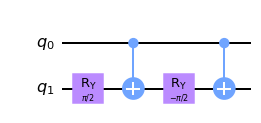

In [18]:
qc = QuantumCircuit(2)
theta = pi # Theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,1)
qc.cx(0,1)
qc.ry(-theta/2,1)
qc.cx(0,1)
qc.draw(output='mpl')

When one goes through this circuit, one can see that if the first qubit is 0 then the two rotations cancel each other out and nothing happens. 

On the other hand, if the first qubit is 1 we will get a state which is equal to applying the rotation $\theta / 2$ two times which forms our initial rotation $\theta$. This works since the X-axis and Y-axis are orthogonal. 

<div class="alert alert-block alert-danger">
For rotation around other axes you might need to use other tricks.
</div>

### Controlled controlled rotation

Above we saw an example on how one can do a controlled rotation around the $Y$-axis.
Now we assume we have a controlled rotation (around the axis we want) and want to build from that a double controlled rotation, which is only applied if both control qubits are 1 similar to the CCX gate.

In [ ]:
qc = QuantumCircuit(3)
theta = pi # Theta can be anything (pi chosen arbitrarily)
qc.cp(theta/2,1,2)
qc.cx(0,1)
qc.cp(-theta/2,1,2)
qc.cx(0,1)
qc.cp(theta/2,0,2)
qc.draw()

In this circuit if both the first and second qubit are 0, then nothing happens at all. If only the second qubit is one, first we apply a rotation by $\pi/2$ and afterwards a rotation by $-\pi/2$ which cancel each other out. If only the first qubit is 1, then we the second qubit will also be one after the first CX so a rotation by $-\pi/2$ will be applied and afterwards a rotation by $\pi/2$ will be applied and these two rotations cancel each other out again.

If both the first and the second qubit are 1 then first there will be a rotation by $\pi/2$ then the second qubit will become 0 so the next rotation does not apply and then it is flipped back to 1. Afterwards another rotation by $\pi/2$ is applied since the first qubit is 1. So we have two times a rotation of $\pi/2$ which form together a rotation of $\pi$.

## The problem

<div id='problem'></div>
<div class="alert alert-block alert-success">

We have seen above how to construct a Hadamard gate with our base set, and now we want to build a Toffoli gate as well. Why the Toffoli gate? As mentioned above, the Toffoli gate is also a universal gate for classical computation the same way the NAND gate is, but it is reversible. Further  it builds a simple universal gate set for quantum computation if combined with the Hadamard gate. 

We have seen some examples on how to express more complex gates using basis gates, we now want to use the knowledge gained to construct a Toffoli gate only using our basis gates. In order to do solve this exercise the above examples on how to construct and use controlled rotations, will come in handy. The biggest challenge is to construct the needed controlled rotations.
    
You can use the code below using the composer widget to construct your circuit.
    
</div>


<div class="alert alert-block alert-danger">

As a reminder the basis gates for IBM Quantum systems are CX, RZ, SX and X gates, so no other gates are allowed.

Of course we want also try to minimize the cost. 
    
$$
Cost = 10 N_{CNOT} + N_{other}
$$
    
</div>


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from ibm_quantum_widgets import CircuitComposer
editorEx = CircuitComposer() 
editorEx
##### Build your quantum circuit here using the composer widget.

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f26806a39d0>)

In [6]:
# You can also build your circuit programmatically using Qiskit code

circuit = QuantumCircuit(3)

# WRITE YOUR CODE BETWEEN THESE LINES - START

circuit .rz(pi/2, 2)
circuit .sx(2)
circuit .rz(pi/2, 2)
circuit .cx(1,2)
circuit.rz(-pi/4,2)
circuit .cx(0,2)
circuit .rz(pi/4, 2)
circuit .cx(1,2)
circuit .rz(pi/4, 1)
circuit .rz(-pi/4, 2)
circuit.cx(0,2)
circuit .cx(0,1)

circuit .rz(pi/4, 2)
circuit .rz(pi/4, 0)
circuit.rz(-pi/4,1)
circuit .rz(pi/2, 2)
circuit .sx(2)
circuit .rz(pi/2, 2)
circuit .cx(0,1)



# WRITE YOUR CODE BETWEEN THESE LINES - END

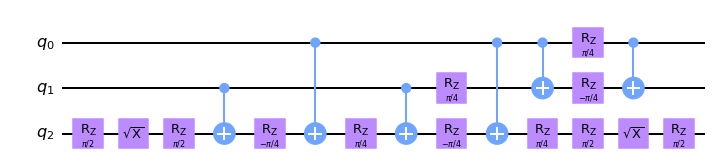

In [7]:
# Checking the resulting circuit
qc = editorEx.circuit 
qc = circuit # Uncomment this line if you want to submit the circuit built using Qiskit code

qc.draw(output='mpl')

In [8]:
# Check your answer using following code
from qc_grader import grade_ex1
grade_ex1(qc)

Grading your answer for ex1. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 73.
Feel free to submit your answer.



In [9]:
# Submit your answer. You can re-submit at any time.
from qc_grader import submit_ex1
submit_ex1(qc)

Submitting your answer for ex1. Please wait...
Success 🎉! Your answer has been submitted.


## Additional information

**Created by:** Marcel Pfaffhauser, Brahmani Thota, Junye Huang

**Version:** 1.0.1